### *Importação das bibliotecas utilizadas*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### **ATIVIDADE** 1
### Escreva um algoritmo que faça a segmentação de imagens, ou de uma imagem de entrada, baseada em regiões

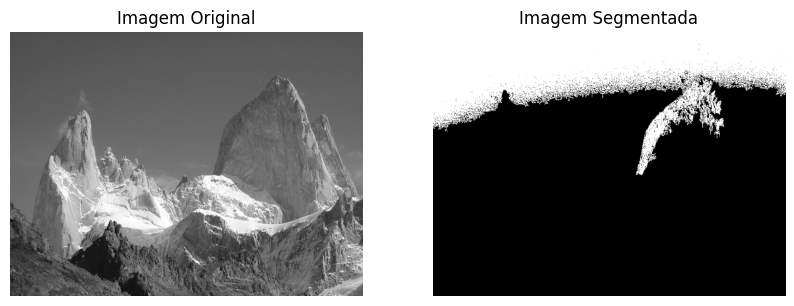

In [ ]:
def region_growing(image, seed):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    
    stack = [seed]
    threshold = 15  
    seed_intensity = image[seed]
    
    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_intensity)) < threshold:
            segmented[x, y] = 255
            
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    stack.append((nx, ny))
    
    return segmented

image = cv2.imread('input/ex1.jpg', cv2.IMREAD_GRAYSCALE)
seed = (100, 100)  

segmented_image = region_growing(image, seed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagem Segmentada')
plt.axis('off')

plt.show()



### **ATIVIDADE** 2
### Escreva um algoritmo que faça a segmentação de imagens, ou de uma imagem de entrada, baseada em bordas

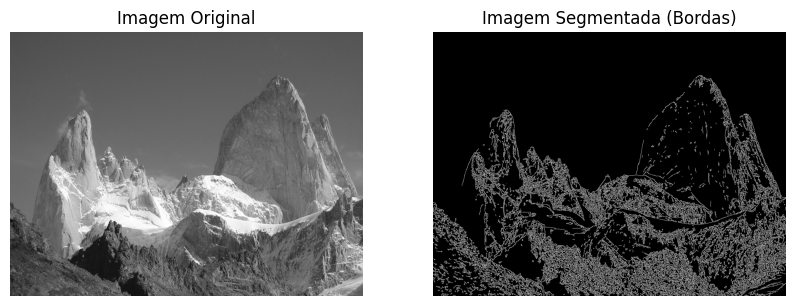

In [3]:
def edge_segmentation(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

image = cv2.imread('input/ex1.jpg', cv2.IMREAD_GRAYSCALE)

segmented_image = edge_segmentation(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagem Segmentada (Bordas)')
plt.axis('off')

plt.show()

### **ATIVIDADE** 3
### Construa um dataset com 200 imagens, calcule a segmentação usando os algoritmos 1 e 2, analise e compare os resultados

Média de pixels detectados como borda: 954231.675


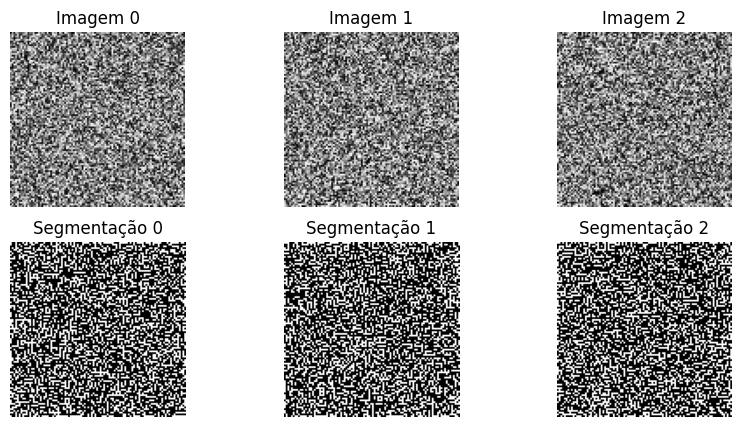

In [ ]:
import os
def edge_segmentation(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

def create_dataset(dataset_path, num_images=200):
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)
    
    for i in range(num_images):
        random_image = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
        cv2.imwrite(os.path.join(dataset_path, f'image_{i}.png'), random_image)

def analyze_results(original_images, segmented_images):
    edge_counts = [np.sum(seg) for seg in segmented_images]
    avg_edges = np.mean(edge_counts)
    
    print(f'Média de pixels detectados como borda: {avg_edges}')
    return edge_counts

dataset_path = 'dataset'
create_dataset(dataset_path)

original_images = []
segmented_images = []

for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    original_images.append(image)
    segmented_images.append(edge_segmentation(image))

edge_counts = analyze_results(original_images, segmented_images)

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'Imagem {i}')
    plt.axis('off')
    
    plt.subplot(2, 3, i + 4)
    plt.imshow(segmented_images[i], cmap='gray')
    plt.title(f'Segmentação {i}')
    plt.axis('off')

plt.show()
